# Predicting The Costs Of Used Cars

## The aim of this exercise is to predict the cost of used cars from features like power, engine, mileage and others

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
import pydotplus
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVR
from keras import regularizers
from keras.callbacks import ModelCheckpoint
%matplotlib inline
import xgboost as xgb

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different fr

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Read the training data

In [3]:
train = pd.read_excel("Data_Train.xlsx")

In [4]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## Read the test data

In [5]:
test = pd.read_excel('Data_Test.xlsx')

In [6]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [7]:
import seaborn as sns

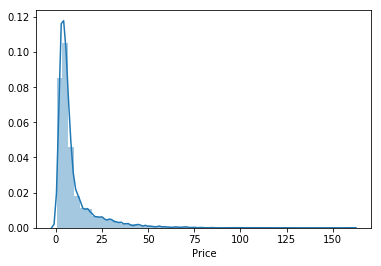

In [8]:
sns.distplot(train['Price'])
# The price shows positive skewness

In [9]:
print('Skewness',train['Price'].skew())
print('Kurtosis',train['Price'].kurt())

Skewness 3.3352319876668415
Kurtosis 17.09220197043644


In [10]:
#Checking categorical variables
train['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [11]:
#Checking categorical variables
train['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [12]:
#Checking categorical variables
train['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [13]:
#Checking categorical variables
train['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [14]:
#Cheacking data types of each columns
train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [15]:
# Chaecking missing values in the data
train.count()/len(train)

Name                 1.000000
Location             1.000000
Year                 1.000000
Kilometers_Driven    1.000000
Fuel_Type            1.000000
Transmission         1.000000
Owner_Type           1.000000
Mileage              0.999668
Engine               0.994019
Power                0.994019
Seats                0.993022
New_Price            0.136900
Price                1.000000
dtype: float64

In [16]:
#Checking missing values in the test data
test.count()/len(test)

Name                 1.000000
Location             1.000000
Year                 1.000000
Kilometers_Driven    1.000000
Fuel_Type            1.000000
Transmission         1.000000
Owner_Type           1.000000
Mileage              1.000000
Engine               0.991896
Power                0.991896
Seats                0.991086
New_Price            0.147488
dtype: float64

In [17]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## Cleaning Training data

In [18]:
def clean_train(train):
    train.fillna(" ", inplace=True)
    train['Mileage']=train['Mileage'].map(lambda x:x.split(" ")[0])
    train['Engine']=train['Engine'].map(lambda x:x.split(" ")[0])
    train['Power']=train['Power'].map(lambda x:x.split(" ")[0])
    train['Mileage'] = pd.to_numeric(train['Mileage'],errors='coerce')
    train['Seats'] = pd.to_numeric(train['Seats'],errors='coerce')
    train['Engine'] = pd.to_numeric(train['Engine'],errors='coerce')
    train['Power'] = pd.to_numeric(train['Power'],errors='coerce')
    train.fillna(train.mean(), inplace=True)
    train['Name2'] = train['Name'].map(lambda x:x.split(" ")[0])
    return train

In [19]:
train = clean_train(train)

In [20]:
train.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Name2
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,,17.74,Audi
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,,2.35,Hyundai
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,,3.50,Nissan
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,21 Lakh,17.50,Toyota
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,,5.20,Volkswagen
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,,1.95,Tata


## Cleaning Test data

In [21]:
def clean_test(test):
    test.fillna(" ", inplace=True)
    test['Mileage']=test['Mileage'].map(lambda x:x.split(" ")[0])
    test['Engine']=test['Engine'].map(lambda x:x.split(" ")[0])
    test['Power']=test['Power'].map(lambda x:x.split(" ")[0])
    test['Mileage'] = pd.to_numeric(test['Mileage'],errors='coerce')
    test['Seats'] = pd.to_numeric(test['Seats'],errors='coerce')
    test['Engine'] = pd.to_numeric(test['Engine'],errors='coerce')
    test['Power'] = pd.to_numeric(test['Power'],errors='coerce')
    test.fillna(test.mean(), inplace=True)
    test['Name2'] = test['Name'].map(lambda x:x.split(" ")[0])
    return test

In [22]:
test = clean_test(test)

In [23]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Name2
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20000,4.0,,Maruti
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30000,5.0,,Maruti
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80000,7.0,25.27 Lakh,Toyota
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,110.38042,5.0,,Toyota
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85000,5.0,,Hyundai


## Missing Values

In [24]:
train['New_Price']=train['New_Price'].map(lambda x:x.split(" ")[0])
test['New_Price']=test['New_Price'].map(lambda x:x.split(" ")[0])
train['New_Price'] = pd.to_numeric(train['New_Price'],errors='coerce')
test['New_Price'] = pd.to_numeric(test['New_Price'],errors='coerce')
train['New_Price']=train["New_Price"].fillna(0)
test['New_Price']=test["New_Price"].fillna(0)

In [25]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Name2
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,0.00,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,0.00,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,0.00,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,0.00,17.74,Audi


## Encoding categorical values

In [26]:
def One_hot_encoding(df,columns):
    label = LabelEncoder()
    for column in columns:
        df[column] = label.fit_transform(df[column])
    return df 

In [27]:
train = One_hot_encoding(train,['Location','Fuel_Type','Transmission','Owner_Type','Name2'])

In [28]:
test = One_hot_encoding(test,['Location','Fuel_Type','Transmission','Owner_Type','Name2'])

In [29]:
train = train[['Name2', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','Price','New_Price']]

In [30]:
train.describe()

,Name2,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,New_Price
count,6019.000000,6019.000000,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,15.332281,5.619704,2013.358199,5.873838e+04,2.363017,0.714238,0.379465,18.134961,1621.276450,113.253050,5.278735,9.479468,2.781902
std,8.052311,2.955933,3.269742,9.126884e+04,1.504939,0.451814,0.818458,4.581528,599.553865,53.231019,0.806012,11.187917,10.226977
min,0.000000,0.000000,1998.000000,1.710000e+02,0.000000,0.000000,0.000000,0.000000,72.000000,34.200000,0.000000,0.440000,0.000000
25%,9.000000,3.000000,2011.000000,3.400000e+04,1.000000,0.000000,0.000000,15.170000,1198.000000,78.000000,5.000000,3.500000,0.000000
50%,17.000000,6.000000,2014.000000,5.300000e+04,1.000000,1.000000,0.000000,18.150000,1493.000000,98.600000,5.000000,5.640000,0.000000
75%,19.000000,8.000000,2016.000000,7.300000e+04,4.000000,1.000000,0.000000,21.100000,1969.000000,138.030000,5.000000,9.950000,0.000000
max,30.000000,10.000000,2019.000000,6.500000e+06,4.000000,1.000000,3.000000,33.540000,5998.000000,560.000000,10.000000,160.000000,99.920000


In [31]:
test=test[['Name2', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','New_Price']]

In [32]:
test.describe()

,Name2,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000
mean,13.822528,5.635332,2013.400324,58507.288493,1.935170,0.733387,0.358995,18.173857,1593.584967,110.380420,5.284546,2.649449
std,7.762186,3.036931,3.179700,35598.702098,1.004779,0.442367,0.803462,4.464615,562.054549,50.870564,0.821931,9.360847
min,0.000000,0.000000,1996.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,624.000000,34.200000,2.000000,0.000000
25%,8.000000,3.000000,2011.000000,34000.000000,1.000000,0.000000,0.000000,15.215000,1198.000000,76.200000,5.000000,0.000000
50%,15.000000,6.000000,2014.000000,54572.500000,1.000000,1.000000,0.000000,18.250000,1461.000000,98.600000,5.000000,0.000000
75%,17.000000,8.000000,2016.000000,75000.000000,3.000000,1.000000,0.000000,21.100000,1968.000000,126.300000,5.000000,0.000000
max,28.000000,10.000000,2019.000000,350000.000000,3.000000,1.000000,3.000000,32.260000,5998.000000,616.000000,10.000000,92.010000


In [33]:
train.dtypes

Name2                  int64
Location               int64
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int64
Transmission           int64
Owner_Type             int64
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
New_Price            float64
dtype: object

## Plots to see relationship between Price and other features

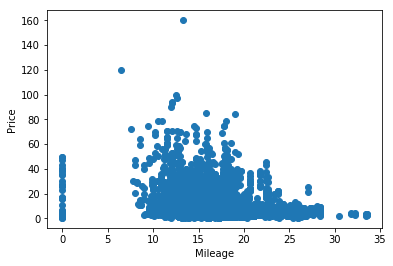

In [34]:
plt.scatter(train['Mileage'],train['Price'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

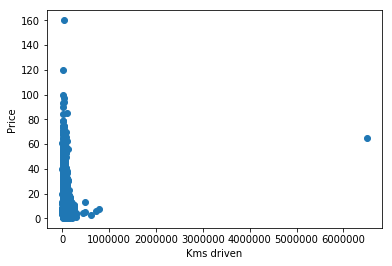

In [35]:
plt.scatter(train['Kilometers_Driven'],train['Price'])
plt.xlabel('Kms driven')
plt.ylabel('Price')
plt.show()

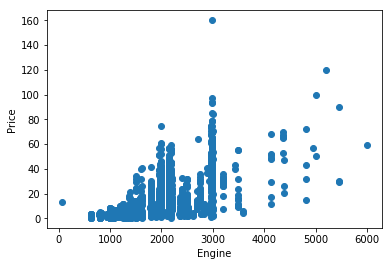

In [36]:
plt.scatter(train['Engine'],train['Price'])
plt.xlabel('Engine')
plt.ylabel('Price')
plt.show()

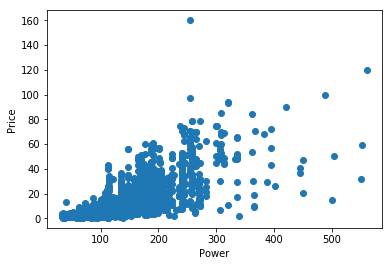

In [37]:
plt.scatter(train['Power'],train['Price'])
plt.xlabel('Power')
plt.ylabel('Price')
plt.show()

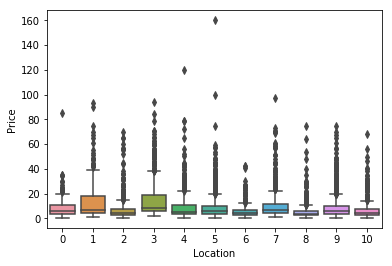

In [38]:
sns.boxplot(x='Location', y="Price", data=train) 

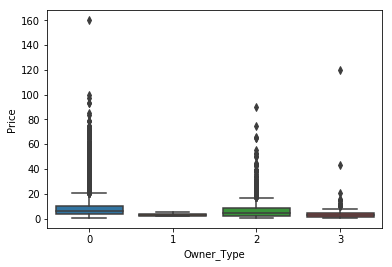

In [39]:
sns.boxplot(x='Owner_Type', y="Price", data=train)

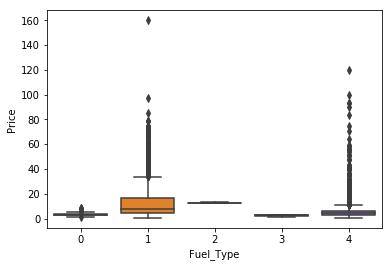

In [40]:
sns.boxplot(x='Fuel_Type', y="Price", data=train)

## Correlation

In [41]:
def visualize_correlation(df):
    corr = train.corr()
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );

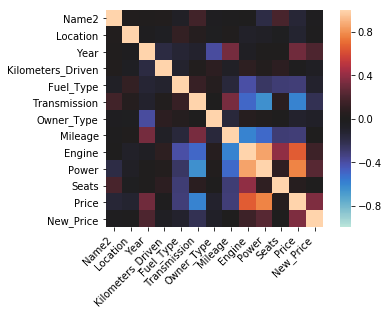

In [42]:
visualize_correlation(train)

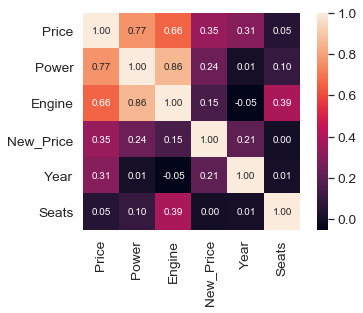

In [43]:
k = 6 #number of variables for heatmap
corr = train.corr()
cols = corr.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

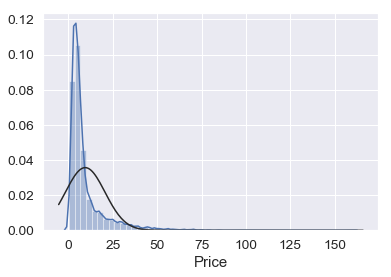

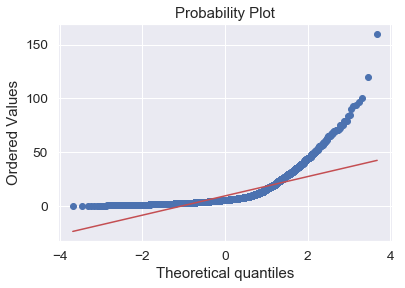

In [44]:
from scipy.stats import norm
from scipy import stats
sns.distplot(train['Price'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['Price'], plot=plt)

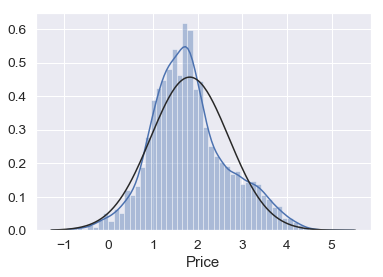

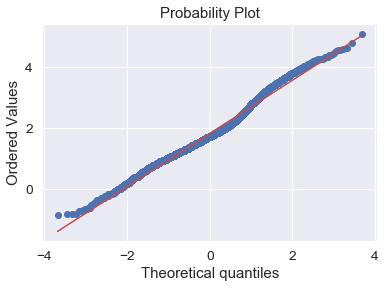

In [45]:
sns.distplot(np.log(train['Price']), fit=norm);
fig = plt.figure()
res = stats.probplot(np.log(train['Price']), plot=plt)

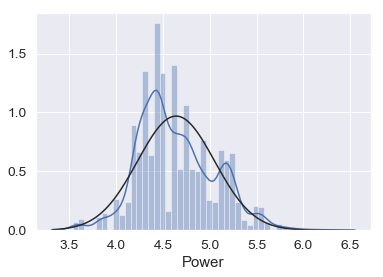

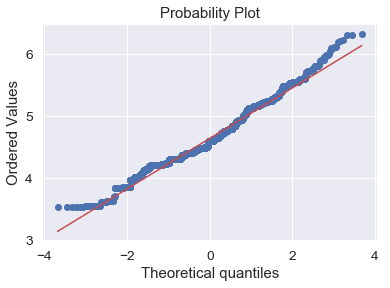

In [46]:
sns.distplot(np.log(train['Power']), fit=norm);
fig = plt.figure()
res = stats.probplot(np.log(train['Power']), plot=plt)

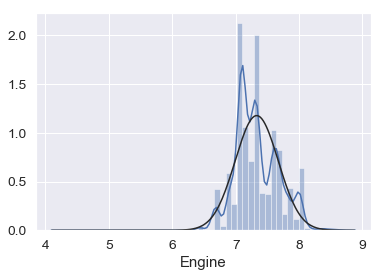

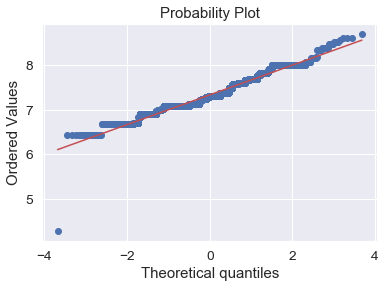

In [47]:
sns.distplot(np.log(train['Engine']), fit=norm);
fig = plt.figure()
res = stats.probplot(np.log(train['Engine']), plot=plt)

## Model 

### Ensemble Modeling with 5 models
1) Random Forest
2) Extra Trees
3) Gradient Boosting
4) AdaBoost
5) ANN


In a nutshell stacking uses as a first-level (base), the predictions of a few basic classifiers and then uses another model at the second-level to predict the output from the earlier first-level predictions.

In [48]:
ntrain = train.shape[0]
ntest = test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(ntrain, n_folds= NFOLDS, random_state=SEED)

In [49]:
for i,item in enumerate(kf):
    print(i,item)

0 (array([1204, 1205, 1206, ..., 6016, 6017, 6018]), array([   0,    1,    2, ..., 1201, 1202, 1203]))
1 (array([   0,    1,    2, ..., 6016, 6017, 6018]), array([1204, 1205, 1206, ..., 2405, 2406, 2407]))
2 (array([   0,    1,    2, ..., 6016, 6017, 6018]), array([2408, 2409, 2410, ..., 3609, 3610, 3611]))
3 (array([   0,    1,    2, ..., 6016, 6017, 6018]), array([3612, 3613, 3614, ..., 4813, 4814, 4815]))
4 (array([   0,    1,    2, ..., 4813, 4814, 4815]), array([4816, 4817, 4818, ..., 6016, 6017, 6018]))


### Wrappers
def init : Python standard for invoking the default constructor for the class. This means that when you want to create an object (classifier), you have to give it the parameters of clf (what sklearn classifier you want), seed (random seed) and params (parameters for the classifiers).

The rest of the code are simply methods of the class which simply call the corresponding methods already existing within the sklearn classifiers. Essentially, we have created a wrapper class to extend the various Sklearn classifiers so that this should help us reduce having to write the same code over and over when we implement multiple learners to our stacker.

In [50]:
# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train,  np.log(y_train))

    def predict(self, x):
        return np.exp(self.clf.predict(x))
    
    def fit(self,x,y):
        return self.clf.fit(x,np.log(y))

In [51]:
# Neural network model
def baseline_model():
    model = Sequential()
    model.add(Dense(128,input_dim = 12, kernel_initializer='normal', activation='relu',kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(256, kernel_initializer='normal', activation='relu',kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(256, kernel_initializer='normal', activation='relu',kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
    model.add(Dropout(0.2))
    #model.add(Dense(256, kernel_initializer='normal', activation='relu',kernel_regularizer=regularizers.l2(0.01),
                #activity_regularizer=regularizers.l1(0.01)))
    #model.add(Dropout(0.2))
    #model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_squared_error'])
    return model

In [52]:
## Class for Keras Regressor
class KerasWrapper(object):
    def __init__(self, clf ,seed=0,params=None):
        np.random.seed(seed)
        self.clf = clf(**params)
    def train(self, x_train, y_train):
        self.clf.fit(x_train, np.log(y_train))

    def predict(self, x):
        return np.exp(self.clf.predict(x))
    
    def fit(self,x,y):
        return self.clf.fit(x,np.log(y))

### Out of Fold
Stacking uses predictions of base classifiers as input for training to a second-level model. However one cannot simply train the base models on the full training data, generate predictions on the full test set and then output these for the second-level training. This runs the risk of your base model predictions already having "seen" the test set and therefore overfitting when feeding these predictions.

In [53]:
## Out of fold Predictions
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [54]:
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_mean_squared_error', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [55]:
## Setting parameters
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 100,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':100,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 10,
    'learning_rate' :1,
    'loss' : 'linear'
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 7,
    'min_samples_leaf': 2,
    'verbose': 0
}

nn_params = {
    'build_fn':baseline_model, 
    'epochs':20, 
    'batch_size':5, 
    'verbose':0,
    'callbacks':callbacks_list
    
}

In [56]:
# Create 5 objects that represent our 5 models
rf = SklearnHelper(clf=RandomForestRegressor, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesRegressor, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostRegressor, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingRegressor, seed=SEED, params=gb_params)
nn = KerasWrapper(clf=KerasRegressor,seed=SEED,params=nn_params)

In [57]:
train.head()

,Name2,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,New_Price
0,18,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75,0.00
1,10,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50,0.00
2,9,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50,8.61
3,18,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00,0.00
4,1,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74,0.00


In [58]:
test.head()

,Name2,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,16,4,2014,40929,0,1,0,32.26,998.0,58.20000,4.0,0.00
1,16,3,2013,54493,3,1,2,24.70,796.0,47.30000,5.0,0.00
2,26,9,2017,34000,1,1,0,13.68,2393.0,147.80000,7.0,25.27
3,26,5,2012,139000,1,1,0,23.59,1364.0,110.38042,5.0,0.00
4,9,9,2014,29000,3,1,0,18.50,1197.0,82.85000,5.0,0.00


In [59]:
y_train = train['Price'].ravel()
train = train.drop(['Price'], axis=1)
train_subset= train[['Power','Engine','New_Price','Year']]
train_subset['Power'] = np.log(train_subset['Power'])
train_subset['Engine'] = np.log(train_subset['Engine'])
test_subset= test[['Power','Engine','New_Price','Year']]
test_subset['Power'] = np.log(test_subset['Power'])
test_subset['Engine'] = np.log(test_subset['Engine'])
x_train = train.values # Creates an array of the train data
x_test = test.values # Creats an array of the test data

In [60]:
scaler  = StandardScaler()

## Training

In [61]:
et_oof_train, et_oof_test = get_oof(et, scaler.fit_transform(x_train), y_train, scaler.transform(x_test)) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,scaler.fit_transform(x_train), y_train, scaler.transform(x_test)) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, scaler.fit_transform(x_train), y_train, scaler.transform(x_test)) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,scaler.fit_transform(x_train), y_train,scaler.transform(x_test)) # Gradient Boost
nn_oof_train, nn_oof_test = get_oof(nn,scaler.fit_transform(x_train), y_train, scaler.transform(x_test)) # NN Reg
print("Training is complete")

Training is complete


## Cross Validation Scores (rmse)

In [62]:
print("Extra Trees-CV: {}".format(sqrt(mean_squared_error(y_train, et_oof_train))))
print("Random Forest-CV: {}".format(sqrt(mean_squared_error(y_train, rf_oof_train))))
print("AdaBoost-CV: {}".format(sqrt(mean_squared_error(y_train, ada_oof_train))))
print("Gradient Boost-CV: {}".format(sqrt(mean_squared_error(y_train, gb_oof_train))))
print("NN-CV: {}".format(sqrt(mean_squared_error(y_train, nn_oof_train))))

Extra Trees-CV: 4.547717676625346
Random Forest-CV: 4.6394424648070585
AdaBoost-CV: 6.460173044650858
Gradient Boost-CV: 3.6234551496531764
NN-CV: 5.464437812233145


## Second Level of stack

In [63]:
x_train = np.concatenate((et_oof_train, rf_oof_train, ada_oof_train,gb_oof_train), axis=1)
x_test = np.concatenate((et_oof_test, rf_oof_test, ada_oof_test,gb_oof_test), axis=1)

In [64]:
gbm = xgb.XGBRegressor(
    #learning_rate = 0.02,
n_estimators = 200,
seed = 0,
colsample_bytree = 0.8,
silent = 1,
subsample = 0.6,
learning_rate = 0.01,
objective = 'reg:linear',
max_depth = 4,
num_parallel_tree =  1,
min_child_weight = 1,
eval_metric = 'rmse',
 ).fit(x_train, y_train)
predictions = gbm.predict(x_test)

## Final Prediction

In [65]:
result = pd.DataFrame({'Price':predictions})
result.head()

,Price
0,2.801204
1,2.724847
2,15.216153
3,3.803073
4,3.997302


In [66]:
result.shape

(1234, 1)

In [67]:
result =  result.round(2)
result.to_excel('Submission4.xlsx')

## Result of submission

### RMSLE (error) : 0.9150